### Roadmap

Through these workshops, we are trying to develop a machine learning model which we can deploy for general use. Here's a snapshot of our progress:

Workshop 1
- Expositional knowledge
- Choosing a problem

Workshop 2
- Importing the data
- Preprocessing the data
- Exploring the data

Workshop 3
- Building some models
- Running training/testing
- Post-processing
- Comparing output
- Choosing an "optimal" model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Preprocessing data w/ NumPy and Pandas

Besides being the foundation for many of the libraries we will use later on, Numpy and Pandas are most useful as a way to preprocess and explore your data. Past this stage, you won't interact with them much until the post-processing stage.

### The dataset

https://www.kaggle.com/code/headsortails/wiki-traffic-forecast-exploration-wtf-eda

The dataset consists of 145000 separate time series, each of which has around some days' worth of data from 2015 to 2016. Each series is measuring the web traffic flow across a wikipedia article.

### The goal

We will be creating a model to forecast the traffic on each of the machines upto several weeks in the future. We will do this using a conventional method, and using deep learning. 

_NOTE: the goal of this workshop is to actually explain the process of building a model, not the theory behind it. Thus, time series analysis will only be covered briefly._

### What do we need to do?

Preprocessing the data means to turn it into a format which makes it suitable for the models to use (i.e., process). Abstractly, this can involve several steps:
- importing the dataset
- grouping values
- filtering values
- transforming/encoding values
- reformatting the data
- handling missing values
- encoding categorical data
- creating train/test/validation datasets

We don't always need all these steps, though- that is heavily dependent on the dataset itself. We can also change the order of these steps as we wish.

### Importing the dataset

Pandas very conveniently has a method for reading csvs out of the box- `pd.read_csv`. It will put the entire dataset into a dataframe for us!

The dataset is located in the `train_1.csv` file. We will also need the `key_1.csv` file, so let's open that too. 

In [2]:
train_df = pd.read_csv("dataset/train_1_100.csv")

key_df = pd.read_csv("dataset/key_1_100.csv")

### Initial exploration

So we have our data loaded, but we have no clue what to do with it. We need to follow some of the preprocessing steps above, but which ones?

To figure that out, we need to look at the raw data.

### A problem

The dataset file is 745mb! If you try and open this in an editor, it will likely cause some issues even on a relatively good computer. So how do we actually look at the data? The answer (for now)- a linux command:

`head -n100 train_1.csv > train_1_100.csv`

`head -n100 key_1.csv > key_1_100.csv`

We can then use the pandas `head` function to take a look at the datasets. Or, since we could look at the raw csv files too.

In [3]:
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36,10.0


In [4]:
key_df.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [5]:
train_df = pd.read_csv("dataset/train_1.csv")

key_df = pd.read_csv("dataset/key_1.csv")

train_df.set_index("Page", inplace=True, drop=True)
key_df.set_index("Page", inplace=True, drop=True)

print(train_df.shape)
print(key_df.shape)

(145063, 550)
(8703780, 1)


In [6]:
train_df.head(n=100)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Madame_Antoine_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,3.0,9.0,6.0,4.0,9.0,2.0,9.0,5.0,6.0
Mamamoo_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,26.0,29.0,44.0,46.0,41.0,22.0,22.0,65.0,46.0,32.0
Mike_D._Angelo_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,11.0,5.0,13.0,5.0,14.0,6.0,8.0,5.0,4.0


### What to do

We can make a few important observations from just these rows!

- We have missing values. We need a way to deal with these.
- The values are a mix of integers and floats.
- Each row has 550 values.
- The values all seem to be in the same ballpark (~0-100)
- Each row in `train_df` corresponds to one or more rows in `key_df`.

Can we trust these observations, and is anything missing? No and yes!

- We need to examine the whole dataset to confirm these.
- The above observations may not hold for all the rows, which will cause problems all throughout the process.

We need to do a bit more exploration!

### Solutions

Based on our observations:

- Find all rows which contains `NaN` and observe their characteristics
- Based on the above step, determine the best ways to deal with the `NaN`'s
- Determine the range of values across all rows
- Determine the correspondence between `key_1` and `train_1`

We can do this using pandas and numpy!

In [7]:
nan_df = train_df[pd.isnull(train_df).any(axis=1)]
print(nan_df.shape)
all_nan_df = train_df[pd.isnull(train_df).all(axis=1)]
print(all_nan_df.shape)

(27786, 550)
(652, 550)


In [8]:
train_df = train_df[~pd.isnull(train_df).all(axis=1)]
print(train_df.shape)

(144411, 550)


In [9]:
nan_df.head(n=20)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
ASTRO_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,11.0,38.0,85.0,79.0,30.0,14.0,10.0,38.0,12.0,51.0
AlphaGo_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,14.0,17.0,19.0,56.0,21.0,13.0,21.0,11.0
B-PROJECT_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,26.0,10.0,5.0,5.0,11.0,10.0,4.0,8.0,6.0
BLACK_PINK_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,56.0,39.0,65.0,78.0,143.0,96.0,63.0,28.0,75.0
Beautiful_Mind_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,8.0,6.0,7.0,2.0,11.0,11.0,29.0,12.0,14.0
Dear_My_Friends_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,12.0,8.0,12.0,3.0,10.0,21.0,6.0,8.0,9.0
Doctors_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,19.0,175.0,17.0,21.0,30.0,65.0,70.0,18.0,68.0


### Can we do better?

Notice that some `NaN`'s are present in groups of 1 or 2 with data points in between. We could potentially fill these in order to preserve more data.

We fill find all rows where the gap in `NaN`'s is 2 or less and fill those rows, dropping all other rows.

In [10]:
def find_all(x):
    nan_size = 0
    nan_find = np.isnan(x.values)
    for val in nan_find:
        if val:
            nan_size += 1
            if nan_size > 2:
                return False
        else:
            nan_size = 0
    return True

nan_run_df = train_df.apply(find_all, axis=1)
train_df["keep"] = nan_run_df
nan_run_df.head()

Page
2NE1_zh.wikipedia.org_all-access_spider                 True
2PM_zh.wikipedia.org_all-access_spider                  True
3C_zh.wikipedia.org_all-access_spider                   True
4minute_zh.wikipedia.org_all-access_spider              True
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider    False
dtype: bool

In [11]:
train_df = train_df[train_df["keep"]]
print(train_df.shape)

(122044, 551)


### Results

Based on our observations we:

- Removed rows with many `NaN`'s in a row or only `Nan`'s
- Filled rows with scattered `NaN`'s with interpolated values

Unresolved:

- Do we need a different scaling strategy for different rows?

How many rows did we save?

In [12]:
temp_train_df = pd.read_csv("dataset/train_1.csv")

temp_nan_df = temp_train_df[pd.isnull(temp_train_df).any(axis=1)]

print(temp_nan_df.shape)
print(train_df.shape)

print(temp_train_df.shape[0] - temp_nan_df.shape[0])
print(train_df.shape[0])
print(train_df.shape[0] - (temp_train_df.shape[0] - temp_nan_df.shape[0]))

(27786, 551)
(122044, 551)
117277
122044
4767


Not bad!

Was it necessary to actually preserve the rows with scattered `NaN`? Probably not. It may pollute our data since the values we are using are interpolated. Since we can assume the time series are (mostly) independent of each other, in this case we can get away with it. However, it's important to judge on a case-by-case basis whether it's worth filling or dropping `NaN`'s.

### When to fill vs. when to drop

We **fill** `NaN` values when:

- There's a small amount of `NaN`'s present
- The data is numerical, or the data is categorical and we can deduce the correct value

Filling `NaN` values will help you preserve your data but it may lower the accuracy. This also depends on the strategy you use to fill the missing values.

We **drop** rows with `NaN` values when:

- There's a large amount of `NaN`'s present

Dropping `NaN` values is easier, and it will help you remove inaccuracies from your data but it will likely result in significant data loss.

Our last preprocessing step (for now) is to fill the remaining rows with `NaN`. 

### A *very* important disclaimer on our replacement policy above

We decided we would fill `NaN`'s on any row with populated values separated by at most 2 `NaN`'s. However, this is not a good way to go about choosing which rows to replace. Consider a row like this one:

[1, `NaN`, `NaN`, 2, `NaN`, `NaN`, 3, `NaN`, `NaN`, ...]

We see that 2/3 of the values are `NaN` but we still preserve the row! This could pollute out data quite a bit, even if we interpolate values to ensure some semblance of accuracy. In reality, we cannot predict the exact values the missing data could have taken, so filling `NaN`'s carelessly can lead to polluted data.

In [13]:
train_df.interpolate(inplace=True)

print(train_df[pd.isnull(train_df).any(axis=1)].shape)

del train_df["keep"]

(0, 551)


Our data is ready! (for now)

# Visualizing with MatPlotLib

MatPlotLib will give us much more insight into the data than just staring at numbers ever could.

MatPlotLib is a plotting library which allows us to visualize our data as graphs. With many configurable settings, and many variations of graphs, MatPlotLib makes creatin graphs as easy as a couple of lines.

Unlike pandas and numpy, MatPlotLib doesn't provide any data structures- instead you operate on a singleton class within MatPlotLib, `pyplot`, often abbreviated as `plt`.

`plt` creates graphs using the `plt.plot` function, which can take python lists, numpy arrays, or pandas series objects as input.

`plt.plot` will either take 1 or 2 iterables as input. If given 1 input, it will plot that input on the `y` axis of the graph with a default `x` axis. If given 2 inputs, it will use the first input as a scale for the `x` axis and the second as a scale for the `y` axis.

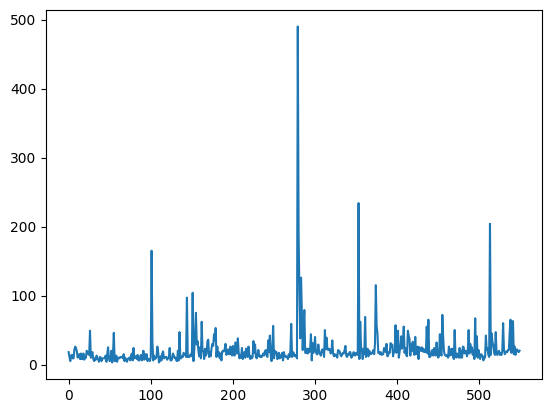

In [14]:
plt.plot(train_df.iloc[0].values)

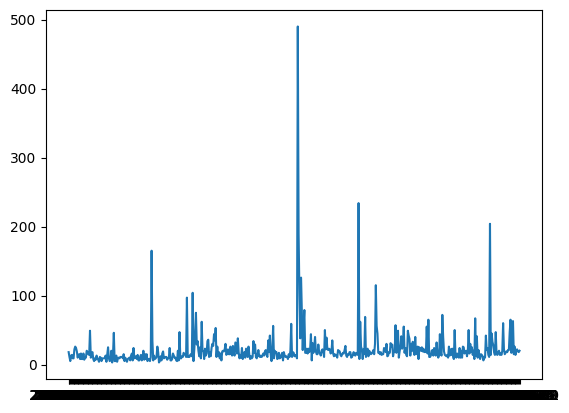

In [15]:
plt.plot(train_df.iloc[0].index, train_df.iloc[0].values)

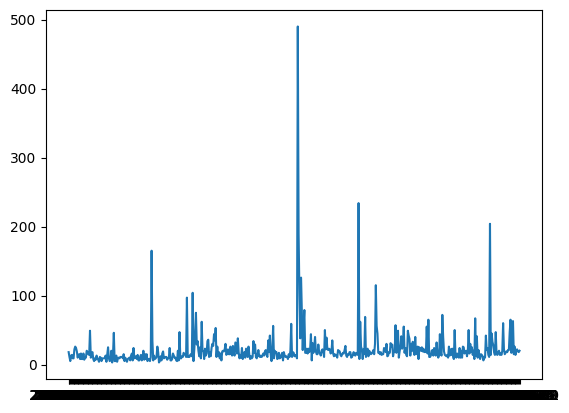

In [16]:
plt.plot(train_df.iloc[0])

### GOOD Visualizing with MatPlotLib

The graph we made above was pretty shoddy. Luckily, we can change many different knobs in the `plt.plot` function to get what we want. As well, MatPlotLib provides many different auxiliary functions to enhance the graph.

[Text(0.0, 0, '2015-07-01'),
 Text(50.0, 0, '2015-08-20'),
 Text(100.0, 0, '2015-10-09'),
 Text(150.0, 0, '2015-11-28'),
 Text(200.0, 0, '2016-01-17'),
 Text(250.0, 0, '2016-03-07'),
 Text(300.0, 0, '2016-04-26'),
 Text(350.0, 0, '2016-06-15'),
 Text(400.0, 0, '2016-08-04'),
 Text(450.0, 0, '2016-09-23'),
 Text(500.0, 0, '2016-11-12')]

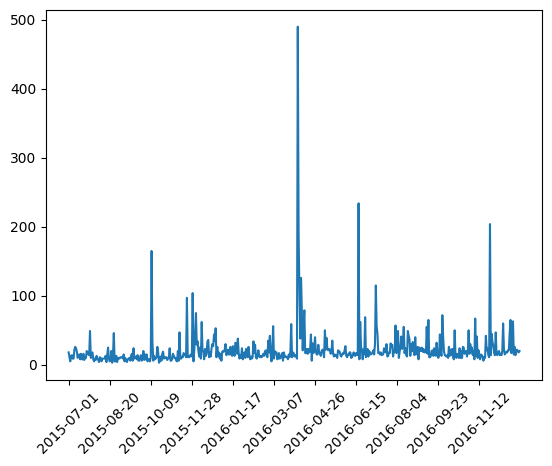

In [17]:
fig, ax = plt.subplots()

plt.plot(train_df.iloc[0].index, train_df.iloc[0].values)
ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)

### Playing with `plt.plot`

There are many configurable parameters for `plt.plot`:

- full list of arguments: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

The list of parameters is pretty extensive and it can usually be a bit cumbersome to enter. For essential styling, matplotlib provides an easy way of defining options, known as format strings!
- format strings are the first parameter you pass to ```plt.plot``` after your input data.
- syntax: "[color][marker shape][line type]" where each is 1 or 2 characters.
    - color: single character denoting a basic color (e.g., red- r, blue- b, etc.)
    - marker shape: single character denoting the shape of the marker for each data point: e.g., o- circle, +- plus
    - line type: denotes line style in one or more characters, e.g. -: solid, --: dashed
    - all are optional
- full list of options for format strings can be found here: https://python-course.eu/numerical-programming/formatting-plot-in-matplotlib.php

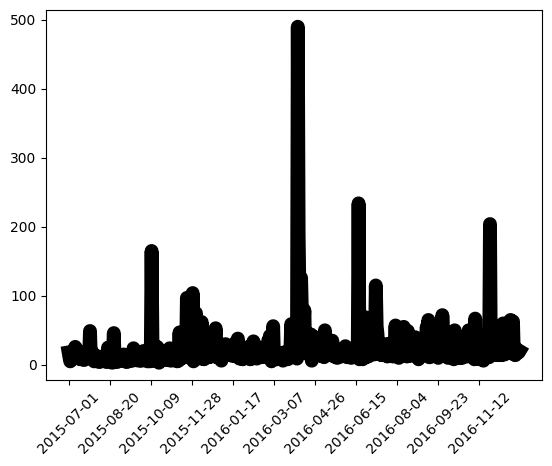

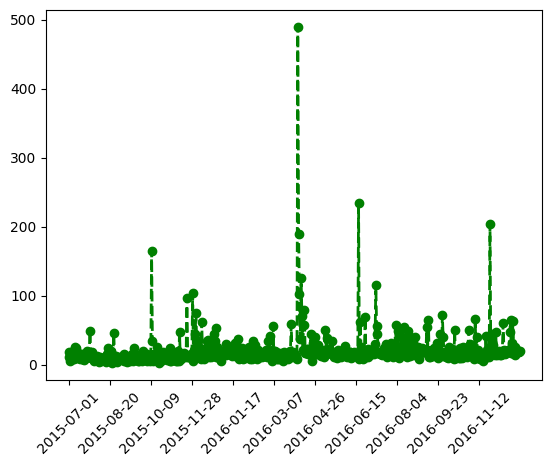

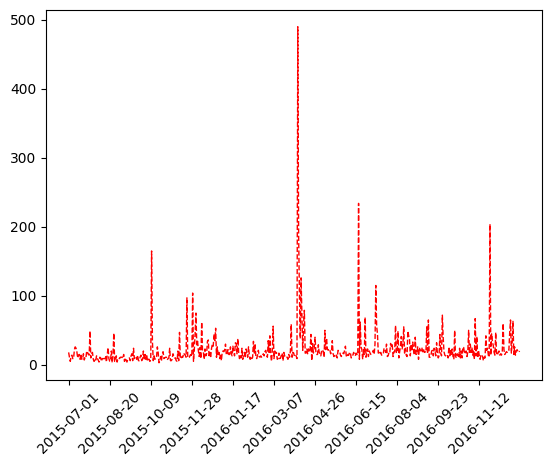

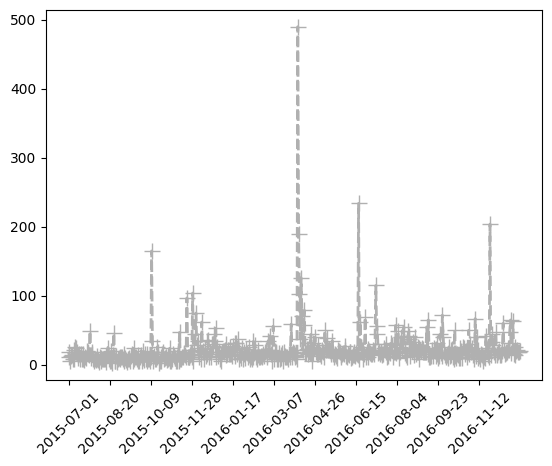

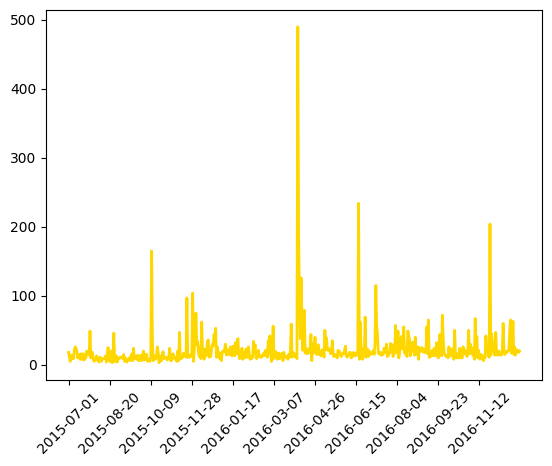

In [18]:
fig, ax = plt.subplots()

plt.plot(train_df.iloc[0], color='black', linewidth=10)
ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)
plt.show()

fig, ax = plt.subplots()
plt.plot(train_df.iloc[0], 'go--', linewidth=2)
ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)
plt.show()

fig, ax = plt.subplots()
plt.plot(train_df.iloc[0], 'r--', linewidth=1)
ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)
plt.show()

fig, ax = plt.subplots()
plt.plot(train_df.iloc[0], color='#b0b0b0', marker='+', linestyle='--',
     linewidth=2, markersize=12)
ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)
plt.show()

fig, ax = plt.subplots()
plt.plot(train_df.iloc[0], color='#FFD700', linestyle='-',
     linewidth=2, markersize=0)
ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)
plt.show()

### A note on the above example

Notice the order of the calls was very important. We had to get the subplots for the current graph, then plot the graph, then set the x labels, then show the graph! This order is important because the `plt` singleton object that matplotlib relies on gradually builds its context of the graph through these calls. Notice that we also had to reset the values of `fig` and `ax`. This is because the `plt.subplots` call actually generates a new `fig` and `ax`! If we used the old object it would have applied to the previous graph.\

### ```fig``` and ```ax```

Matplotlib plots can be broken into several parts, which makes them easier to interact with and customize. This functionality can be accessed using functions discussed previously, but it is often easier to do this using ```fig``` and ```ax```.

- ```fig```: the actual figure of the plot
  - allows the size of the plot to be set
  - allows for macroscopic parameters of the plot to be set: main title, layout, etc.
- ```ax```: the axes of the plot
  - allows for labels, limits, and more to be set
  - allows for axis-specific settings

### Some more cosmetic fixes

Our graph isn't exactly the prettiest- let's review some cosmetic fixes that we can use to resize it, and add some essential components like title and axis labels.

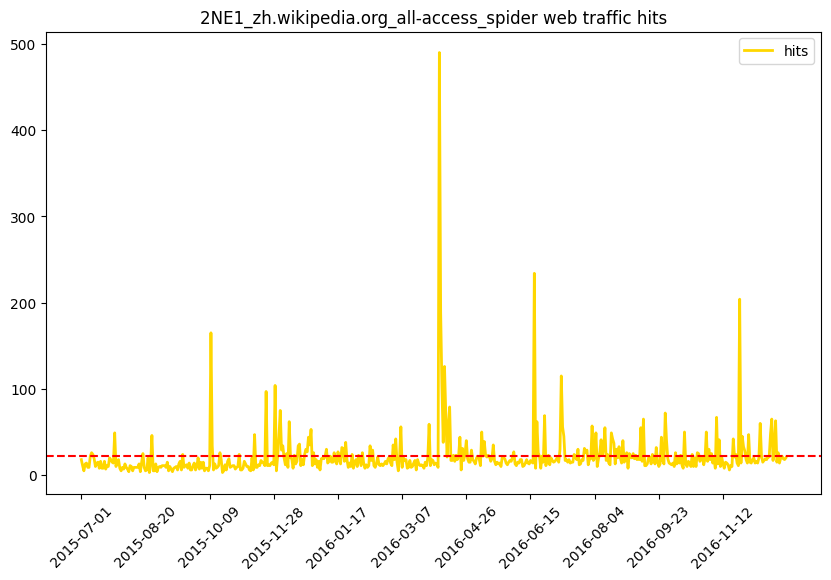

In [19]:
name = train_df.index.values[0]

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(train_df.iloc[0], color='#FFD700', linestyle='-',
     linewidth=2, markersize=0, label='hits')
plt.axhline(y=train_df.iloc[0].values.mean(), linestyle='--', color='#FF0000')

plt.legend()

plt.title(f"{name} web traffic hits")

ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)
plt.show()

### Multiple plots

One of our time series alone is not good enough- we need to see several at the same time.

This can be done using `plt.plot`- we only need to call it multiple times in a row!

When doing this, `plt.plot` will put all datasets that are passed in on a single graph- that is, until you call `plt.show`. `plt.show` delimits the `plt.plot` calls and displays the graph with preceding all `plt.plot` calls immediately.

[Text(0.0, 0, '2015-07-01'),
 Text(50.0, 0, '2015-08-20'),
 Text(100.0, 0, '2015-10-09'),
 Text(150.0, 0, '2015-11-28'),
 Text(200.0, 0, '2016-01-17'),
 Text(250.0, 0, '2016-03-07'),
 Text(300.0, 0, '2016-04-26'),
 Text(350.0, 0, '2016-06-15'),
 Text(400.0, 0, '2016-08-04'),
 Text(450.0, 0, '2016-09-23'),
 Text(500.0, 0, '2016-11-12')]

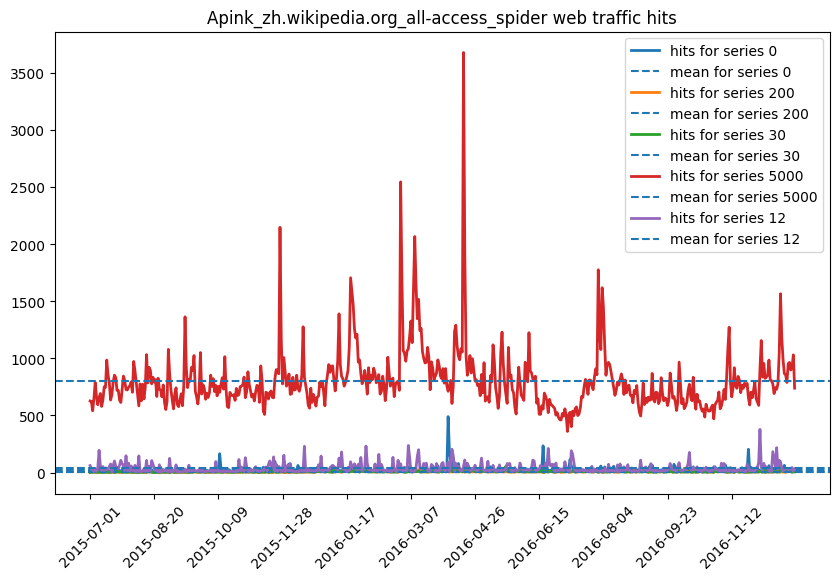

In [20]:
def plot_series(i=0):
    name = train_df.index.values[i]
    plt.plot(train_df.iloc[i], linestyle='-',
         linewidth=2, markersize=0, label=f'hits for series {i}')
    plt.axhline(y=train_df.iloc[i].values.mean(), linestyle='--', label=f"mean for series {i}")
    plt.legend()
    plt.title(f"{name} web traffic hits")

fig, ax = plt.subplots(figsize=(10, 6))
plot_series(0)
plot_series(200)
plot_series(30)
plot_series(5000)
plot_series(12)
ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)
    

[Text(0.0, 0, '2015-07-01'),
 Text(50.0, 0, '2015-08-20'),
 Text(100.0, 0, '2015-10-09'),
 Text(150.0, 0, '2015-11-28'),
 Text(200.0, 0, '2016-01-17'),
 Text(250.0, 0, '2016-03-07'),
 Text(300.0, 0, '2016-04-26'),
 Text(350.0, 0, '2016-06-15'),
 Text(400.0, 0, '2016-08-04'),
 Text(450.0, 0, '2016-09-23'),
 Text(500.0, 0, '2016-11-12')]

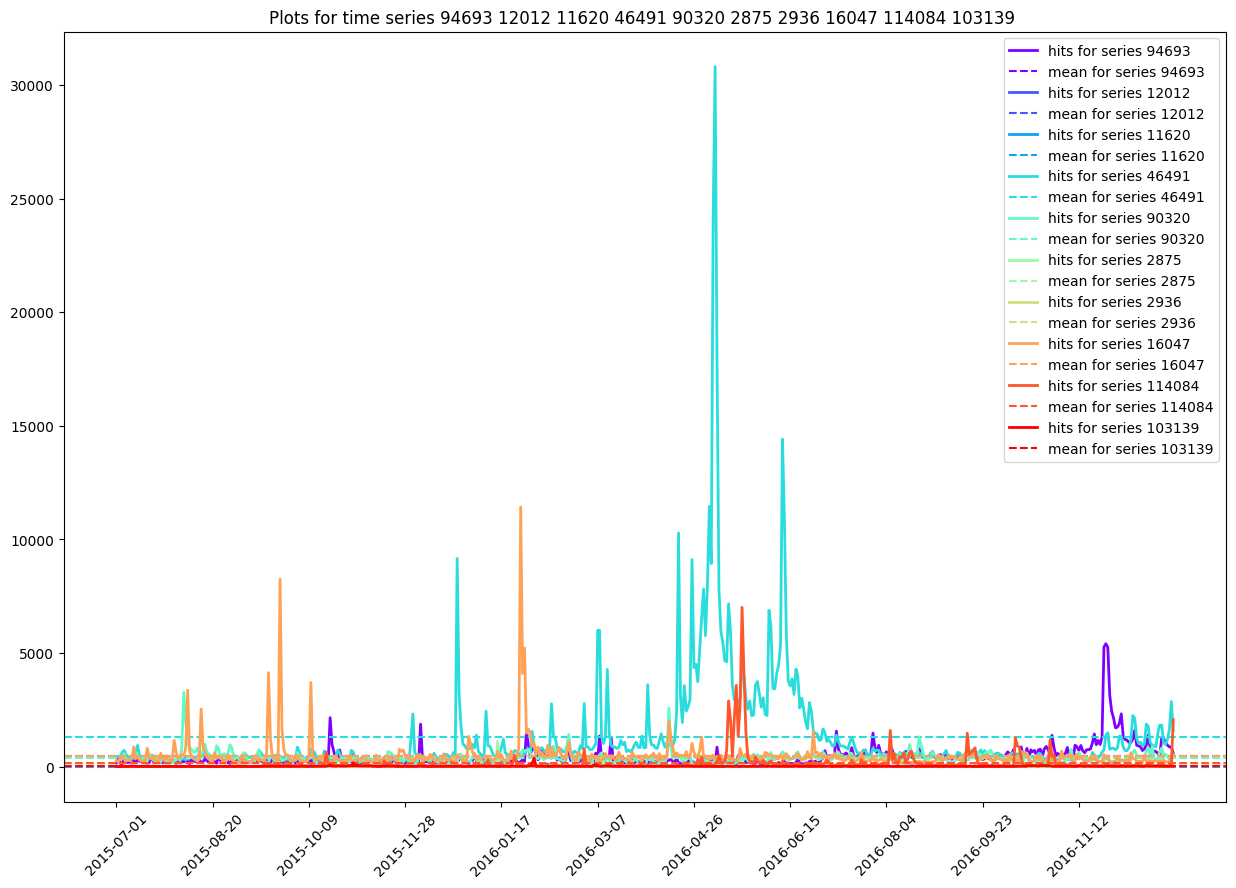

In [21]:
from matplotlib.pyplot import cm

color = cm.rainbow(np.linspace(0, 1, 10))
color_index = 0

def plot_series(i=0):
    global color_index
    name = train_df.index.values[i]
    plt.plot(train_df.iloc[i], linestyle='-',
         linewidth=2, markersize=0, label=f'hits for series {i}', color=color[color_index])
    plt.axhline(y=train_df.iloc[i].values.mean(), linestyle='--', label=f"mean for series {i}", color=color[color_index])
    plt.legend()
    color_index = (color_index + 1) % 10

# ---------

fig, ax = plt.subplots(figsize=(15, 10))

from numpy.random import uniform

values = uniform(size=(10,))

for value in values:
    plot_series(int(value * train_df.shape[0]))

title = "Plots for time series "

for value in (values * train_df.shape[0]).astype('int64'):
    title += f"{value} "

plt.title(title)

ax.set_xticks(train_df.iloc[0].index[::50])
ax.set_xticklabels(train_df.iloc[0].index[::50], rotation=45)

### What we learnt about the dataset

Just through this small observation, we learnt that our time series are on many different magnitudes so we will need to accomodate for all of them. 

Randomly screening the time series like this is not a good way of observing the characterisitcs of our dataset. We should plot the min, max, and average values for each of our time series to get a better idea. Let's do that!

*A note on the range*: we restrict the range of our histograms to between 0 and 5000 just to make them look pretty. I am also printing out the maximum value in each of the following dataframes so that you can see the real highest value.

Page
2NE1_zh.wikipedia.org_all-access_spider       21.756364
2PM_zh.wikipedia.org_all-access_spider        25.392727
3C_zh.wikipedia.org_all-access_spider          5.203636
4minute_zh.wikipedia.org_all-access_spider    17.125455
5566_zh.wikipedia.org_all-access_spider       16.412727
dtype: float64
Maximum average: 21938511.094545454


Text(0.5, 1.0, 'Distribution of average views')

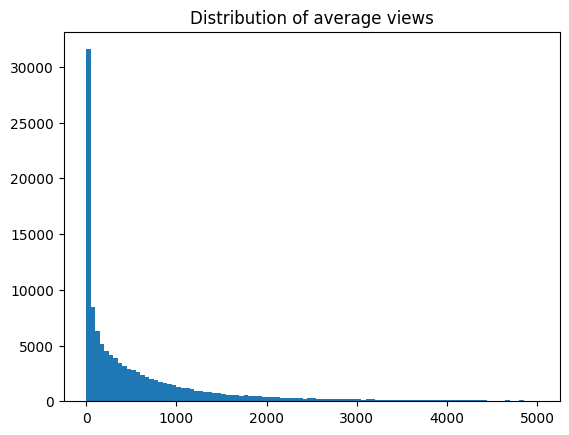

In [22]:
avg_df = train_df.mean(axis=1)

print(avg_df.iloc[:5])

fig, ax = plt.subplots()

print("Maximum average:", avg_df.max())

ax.hist(avg_df, bins=100, range=[0, 5000])

plt.title("Distribution of average views")

Page
2NE1_zh.wikipedia.org_all-access_spider       490.0
2PM_zh.wikipedia.org_all-access_spider        621.0
3C_zh.wikipedia.org_all-access_spider         210.0
4minute_zh.wikipedia.org_all-access_spider    303.0
5566_zh.wikipedia.org_all-access_spider       213.0
dtype: float64
Maximum max: 67264258.0


Text(0.5, 1.0, 'Distribution of maximum views')

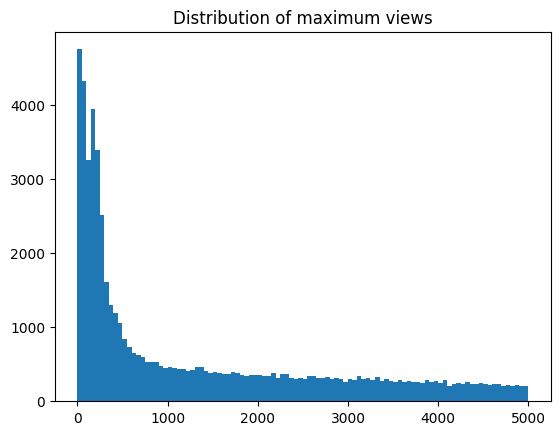

In [23]:
max_df = train_df.max(axis=1)

print(max_df.iloc[:5])

fig, ax = plt.subplots()

print("Maximum max:", max_df.max())

ax.hist(max_df, bins=100, range=[0, 5000])

plt.title("Distribution of maximum views")

Page
2NE1_zh.wikipedia.org_all-access_spider       21.756364
2PM_zh.wikipedia.org_all-access_spider        25.392727
3C_zh.wikipedia.org_all-access_spider          5.203636
4minute_zh.wikipedia.org_all-access_spider    17.125455
5566_zh.wikipedia.org_all-access_spider       16.412727
dtype: float64
Maximum min: 13658940.0


Text(0.5, 1.0, 'Distribution of minimum views')

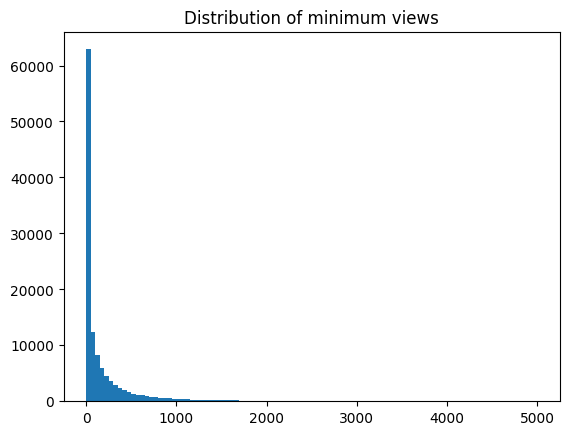

In [24]:
min_df = train_df.min(axis=1)

print(avg_df.iloc[:5])

fig, ax = plt.subplots()

print("Maximum min:", min_df.max())

ax.hist(min_df, bins=100, range=[0, 5000])

plt.title("Distribution of minimum views")

Page
2NE1_zh.wikipedia.org_all-access_spider       29.390758
2PM_zh.wikipedia.org_all-access_spider        33.984813
3C_zh.wikipedia.org_all-access_spider         13.505932
4minute_zh.wikipedia.org_all-access_spider    19.337118
5566_zh.wikipedia.org_all-access_spider       15.674589
dtype: float64
Maximum stddev: 9529193.607360581


Text(0.5, 1.0, 'Distribution of std. dev of views')

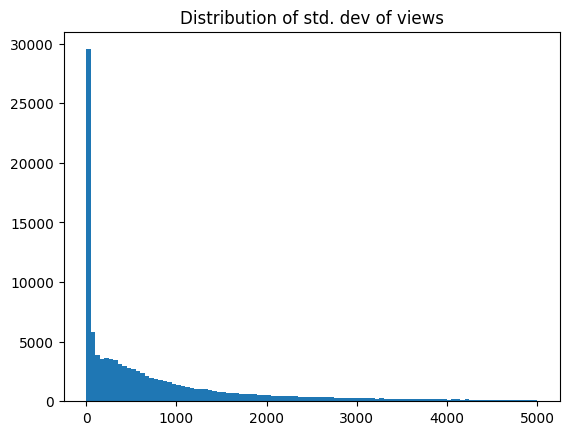

In [25]:
std_df = train_df.std(axis=1)

print(std_df.iloc[:5])

fig, ax = plt.subplots()

print("Maximum stddev:", std_df.max())

ax.hist(std_df, bins=100, range=[0, 5000])

plt.title("Distribution of std. dev of views")

### The problem with MatPlotLib

There's a million ways to do the same thing! This often makes it really hard to debug if you run into errors, as the stackoverflow threads you find may not be using the same methods that you are. If you're ever in a pinch, try replicating the given solution exactly as it is in the thread. This will more than likely work. In fact, many of the examples in this notebook were the product of these responses. 

Using MatPlotLib is sort of like a puzzle. You need to figure out the best way to graph!

### Looking ahead

Workshop #3: we will finish preprocessing using `scikit-learn` and/or `scipy`, and then do some forecasting using `tensorflow`!